In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import numpy as np
from sklearn.decomposition import NMF
%matplotlib inline

In [168]:
csv_list = ['links', 'movies', 'ratings']

dfs= []
for item in csv_list: 
    dfs.append(pd.read_csv(f'/Users/dinakats/Desktop/SPICED/Recommender/raw_data/ml-latest-small/{item}.csv', engine='python'))

In [169]:
dfs

[      movieId   imdbId    tmdbId
 0           1   114709     862.0
 1           2   113497    8844.0
 2           3   113228   15602.0
 3           4   114885   31357.0
 4           5   113041   11862.0
 ...       ...      ...       ...
 9737   193581  5476944  432131.0
 9738   193583  5914996  445030.0
 9739   193585  6397426  479308.0
 9740   193587  8391976  483455.0
 9741   193609   101726   37891.0
 
 [9742 rows x 3 columns],
       movieId                                      title  \
 0           1                           Toy Story (1995)   
 1           2                             Jumanji (1995)   
 2           3                    Grumpier Old Men (1995)   
 3           4                   Waiting to Exhale (1995)   
 4           5         Father of the Bride Part II (1995)   
 ...       ...                                        ...   
 9737   193581  Black Butler: Book of the Atlantic (2017)   
 9738   193583               No Game No Life: Zero (2017)   
 9739   193585 

In [170]:
data = pd.merge(dfs[0], dfs[1], right_on)

NameError: name 'right_on' is not defined

In [171]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['movieId'], how='inner'), dfs)

In [172]:
df_merged.set_index(['movieId'], inplace = True)

In [173]:
df_merged

,imdbId,tmdbId,title,genres,userId,rating,timestamp
movieId,,,,,,,
1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...,...
193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805


In [174]:
df_merged.dtypes

imdbId         int64
tmdbId       float64
title         object
genres        object
userId         int64
rating       float64
timestamp      int64
dtype: object

In [175]:
counts = df_merged.groupby('title').agg({'rating': 'mean', 'userId':'count'})
counts.sort_values(['userId','rating'], ascending=[False, False])

,rating,userId
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
...,...,...
"Wasp Woman, The (1959)",0.500000,1
While the City Sleeps (1956),0.500000,1
Wizards of the Lost Kingdom II (1989),0.500000,1


In [176]:
counts[(counts.rating < 2.5)& (counts.userId>40)]

,rating,userId
title,,
Batman & Robin (1997),2.214286,42
Coneheads (1993),2.420635,63
"Flintstones, The (1994)",2.357143,42
Striptease (1996),2.414634,41
Wild Wild West (1999),2.207547,53


In [177]:
df_merged.reset_index(inplace=True)

In [178]:
df_merged

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...,...,...
100831,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805
100834,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [227]:
dfs[1][['movieId','title']]

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [230]:
movieId_toname= dfs[1].set_index('movieId').to_dict()

In [235]:
movieId_toname['title'][193587]

'Bungo Stray Dogs: Dead Apple (2018)'

In [237]:
adj = df_merged.set_index(['movieId', 'userId']).unstack()

In [238]:
adj = adj['rating']

In [239]:
adj = adj.T

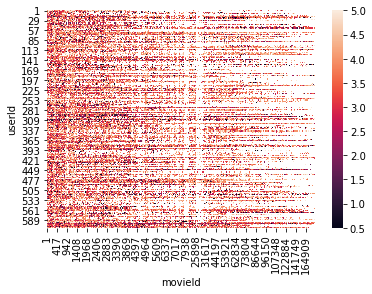

In [240]:
sns.heatmap(adj)

In [243]:
#change movieid names 
adj.rename(columns = movieId_toname['title'], inplace=True)

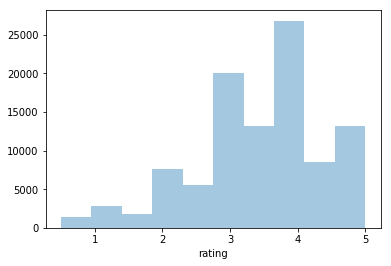

In [189]:
#histogram of ratings
sns.distplot(df_merged.rating, bins=10, kde=False)

In [190]:
#split the histograms by genre

In [191]:
df_merged.genres.value_counts() #maybe just split into comedy, drama, action

Comedy                                    7196
Drama                                     6291
Comedy|Romance                            3967
Comedy|Drama|Romance                      3000
Comedy|Drama                              2851
                                          ... 
Action|Adventure|Drama|Fantasy|Romance       1
Comedy|Sci-Fi|War                            1
Comedy|Musical|Sci-Fi|Western                1
Comedy|Romance|Western                       1
Comedy|Fantasy|Mystery|Sci-Fi                1
Name: genres, Length: 951, dtype: int64

In [192]:
df_merged['main_genre']=np.select(
    [df_merged['genres']==('Comedy|Drama'),
     df_merged['genres'].str.contains('Comedy'), 
     df_merged['genres'].str.contains('Drama'), 
     df_merged['genres'].str.contains('Action')],
    ['Dramedy','Comedy','Drama','Action'], default='null')



In [193]:
df_merged[df_merged.main_genre=='null']

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,main_genre
215,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,6,4.0,845553522,null
216,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,8,4.0,839463806,null
217,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,18,3.0,1455617462,null
218,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,19,3.0,965704331,null
219,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,20,3.0,1054038313,null
...,...,...,...,...,...,...,...,...,...
100818,190183,4073790,445651.0,The Darkest Minds (2018),Sci-Fi|Thriller,50,3.5,1533302021,null
100823,190219,179011,48610.0,Bunny (1998),Animation,338,1.0,1530148473,null
100824,190221,3333182,460631.0,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary,338,1.0,1530148473,null
100829,193573,3837248,333623.0,Love Live! The School Idol Movie (2015),Animation,184,4.0,1537099811,null


In [212]:
df_merged.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5922        1
153386      1
57147       1
5986        1
8196        1
Name: movieId, Length: 9724, dtype: int64

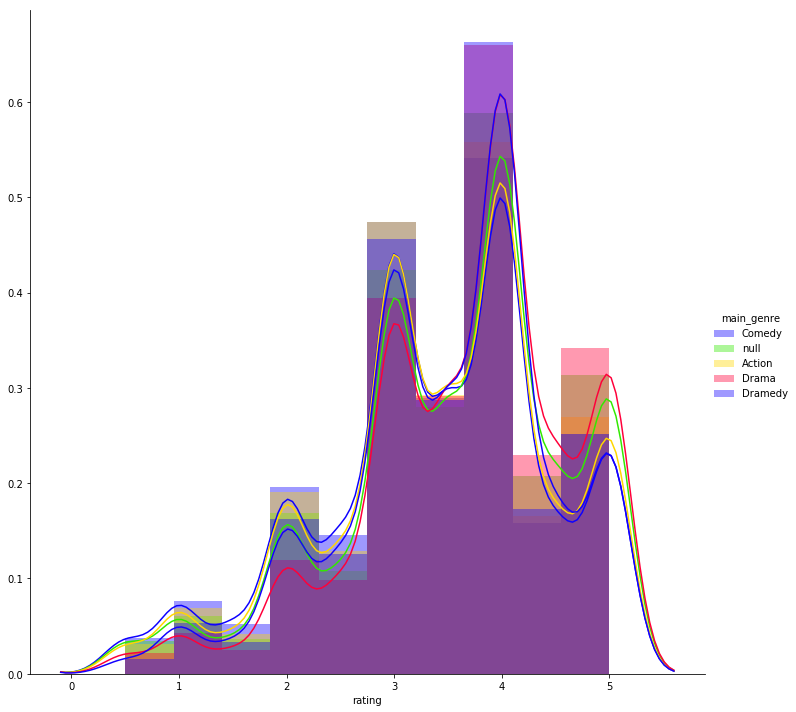

In [194]:

g = sns.FacetGrid(df_merged, hue="main_genre", height = 10, palette='prism')
g = g.map(sns.distplot, "rating", bins=10, kde = True, kde_kws = {'bw':.2})
g.add_legend(title='main_genre') #legend doesn't appear to be doing much

In [245]:
#try just fillin in with zeros for the imputation
adj_zeros = adj.fillna(0)

In [246]:
adj_zeros

movieId,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
#try to do the nmf 
model = NMF(n_components=50) #951 individual 'genres'
model.fit(adj_zeros)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [199]:
model.components_

array([[0.        , 0.66790674, 0.8210837 , ..., 0.        , 0.        ,
        0.        ],
       [0.82866187, 0.37687624, 0.        , ..., 0.08334384, 0.08334384,
        0.03513029],
       [0.64109336, 1.0964015 , 0.20713905, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.17384262, 0.24190362, 0.09049018, ..., 0.        , 0.        ,
        0.        ],
       [0.22718025, 0.34872754, 0.04924096, ..., 0.        , 0.        ,
        0.        ],
       [0.26188518, 0.16569052, 0.20643364, ..., 0.        , 0.        ,
        0.        ]])

In [203]:
Q = pd.DataFrame(model.components_)
Q #'genre' table

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000000,0.667907,0.821084,0.000000,0.000000,1.863808,0.000000,0.000000,0.000000,0.573430,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.828662,0.376876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.083344,0.071438,0.095250,0.095250,0.083344,0.095250,0.083344,0.083344,0.083344,0.035130
2,0.641093,1.096401,0.207139,0.086937,0.247212,0.315899,0.254536,0.121728,0.000000,1.560213,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.332210,0.000000,0.000000,0.000000,0.000000,0.250002,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.445130,0.399975,0.020139,0.046108,0.000000,0.000000,0.074427,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.489531,0.374740,0.508729,0.000000,0.253597,0.375632,0.381151,0.382284,0.000000,0.367926,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.729340,0.000000,0.000000,0.076853,0.000000,0.559200,0.000000,0.000000,0.000000,0.150346,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.495462,0.000000,0.000000,0.000000,0.071301,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007471
8,0.604173,0.603732,0.000000,0.000000,0.013865,0.605891,0.000000,0.000000,0.000000,0.596079,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.321623,0.000000,0.000000,0.000427,0.000000,0.000000,0.347034,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [204]:
P = pd.DataFrame(model.transform(adj_zeros))
P #'user preferance' table

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.236087,0.000000,0.000000,0.441083,0.000000,0.0,0.014811,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.293988,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,1.615481
1,0.000000,0.111379,0.000000,0.229591,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.506944,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.012883,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.004395,0.000000,...,0.062387,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.203787,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.133780,0.08373,0.0,1.769958,0.000000,0.000000,0.000000,0.055927
4,0.000000,0.000000,0.832162,0.119059,0.000000,0.0,0.024336,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.0,0.039806,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.000000,0.010102,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,6.943326,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
606,0.133106,0.000000,0.266275,0.071060,0.468774,0.0,0.000000,0.00000,0.000000,0.000000,...,0.086428,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.334051,0.000000
607,0.590163,0.000000,0.000000,0.381834,0.000000,0.0,0.000000,0.53309,0.000000,0.000000,...,0.474032,0.000000,0.521642,0.00000,0.0,0.000000,0.000000,0.328549,0.000000,0.570431
608,0.000000,0.000000,0.670765,0.056440,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.004858,0.000000,0.00000,0.0,0.000000,0.043195,0.000000,0.000000,0.000000


In [247]:
Rhat = pd.DataFrame(np.dot(P, Q), columns = adj.columns)
Rhat

movieId,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
0,2.755496,1.575092,1.036206,0.001138,0.303769,1.596931,0.175355,0.082044,0.068732,2.101693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.220653,0.114280,0.000000,0.000000,0.030738,0.057398,0.002829,0.000000,0.000184,0.000000,...,0.009283,0.007957,0.010609,0.010609,0.009283,0.010609,0.009283,0.009283,0.009283,0.020410
2,0.080933,0.057441,0.076605,0.000000,0.003926,0.062568,0.022045,0.000031,0.007590,0.043899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015
3,2.179073,0.549135,0.223358,0.041649,0.327962,0.718799,0.315182,0.069560,0.114871,0.306880,...,0.000166,0.000143,0.000190,0.000190,0.000166,0.000190,0.000166,0.000166,0.000166,0.000000
4,1.009510,1.105889,0.300049,0.088624,0.382965,0.485967,0.381724,0.134326,0.088283,1.302162,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2.373483,0.014757,0.000000,0.002963,0.000000,0.019026,2.409570,0.000000,0.000000,0.049669,...,0.000842,0.000722,0.000962,0.000962,0.000842,0.000962,0.000842,0.000842,0.000842,0.001429
606,1.961739,1.029391,0.326923,0.044787,0.074303,1.317847,0.142616,0.042078,0.018132,1.703156,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000020
607,2.673315,1.835843,1.415996,0.027602,0.173828,3.477068,0.353093,0.071232,0.057543,3.776868,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004095
608,0.496485,0.761351,0.138942,0.058314,0.165821,0.253846,0.170734,0.081651,0.000000,1.093614,...,0.000602,0.000516,0.000688,0.000688,0.000602,0.000688,0.000602,0.000602,0.000602,0.000292


In [248]:
model.reconstruction_err_

775.5461200140636

In [249]:
model2 = NMF(n_components=100) #951 individual 'genres'
model2.fit(adj_zeros)
model2.reconstruction_err_

653.912072397624

In [250]:
model3 = NMF(n_components=200) #951 individual 'genres'
model3.fit(adj_zeros)
model3.reconstruction_err_

479.15438831092274